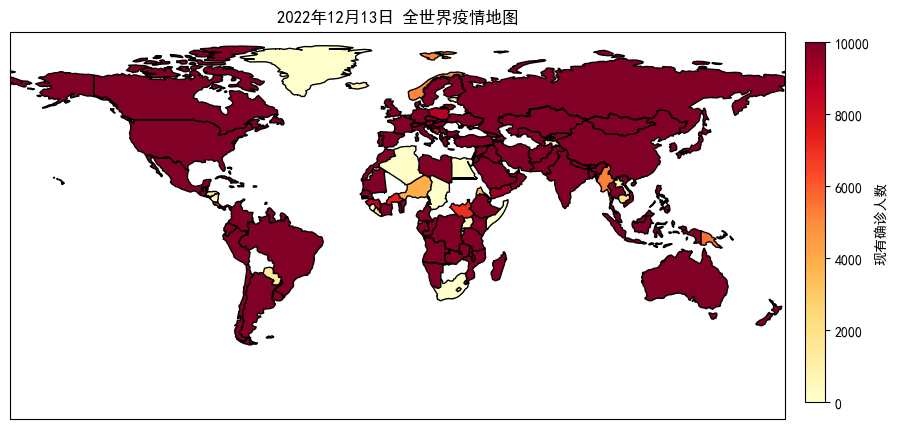

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import cartopy.crs as ccrs
from cartopy.io import shapereader
from pylab import mpl

# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

# 加载世界现有确诊病例数据
last_day_corona_virus = pd.read_json('../data/last_day_corona_virus.json')
# 计算疫情日期
current_date = pd.to_datetime(last_day_corona_virus['createTime'][0], unit='ms')
current_date_str = f'{current_date.year}年{current_date.month}月{current_date.day-1}日'
# print(current_date_str)

# 统计最近一日各国现有确诊病例数量
datas = last_day_corona_virus.pivot_table(values='currentConfirmedCount', index='provinceName')['currentConfirmedCount']
# 按现有确诊确诊数量, 进行倒叙排
datas = datas.sort_values(ascending=False)

# 国家地理文件
shpfilename = shapereader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')

# 地理信息文件阅读器
reader = shapereader.Reader(shpfilename)
# 获取文件中国家地理信息
countries_map = reader.records()
# 疫情国家与地图国家映射关系
names_dict = {'斐济':'斐濟', '苏里南':'蘇利南','加纳':'迦納','几内亚比绍':'幾內亞比索','中非共和国':'中非共和國','赞比亚共和国':'赞比亚',
              '中国':'中华人民共和国','亚美尼亚':'亞美尼亞','刚果（金）':'刚果民主共和国', '刚果（布）':'刚果共和国','北马其顿':'馬其頓共和國',
              '罗马尼亚':'羅馬尼亞','博茨瓦纳':'波札那','马里':'马里共和国','圣马丁岛':'荷属圣马丁','塞浦路斯':'賽普勒斯','多米尼加':'多明尼加',
              '委内瑞拉':'委內瑞拉', '尼日利亚':'奈及利亞','韩国':'大韩民国','布隆迪共和国':'蒲隆地','黑山':'蒙特內哥羅','蒙古':'蒙古国',
              '荷兰':'荷蘭','苏丹':'苏丹共和国','突尼斯':'突尼西亞','白俄罗斯':'白罗斯','玻利维亚':'玻利維亞','爱尔兰':'爱尔兰共和国',
              '津巴布韦':'辛巴威', '波黑':'波斯尼亚和黑塞哥维那', '新喀里多尼亚':'新喀里多尼亞','斯里兰卡':'斯里蘭卡', '也门共和国':'也门',
              '阿联酋':'阿拉伯联合酋长国','拉脱维亚':'拉脫維亞'
}

# 获取画布与坐标系
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# 定义一个字典, 为了方便根据名字找地理位置信息
geom_dict = {}

# 最大值
vmax = 10000
cmap = plt.cm.YlOrRd

# 边框色
edgecolor = 'black'

# 初始疫情地图颜色, 准备国家名字与其地理位置的对应关系
for country in countries_map:
    geom_dict[country.attributes['NAME_ZH'].strip(b'\x00'.decode())] = country.geometry

# 清空当前坐标系
ax.clear()
for country_name in datas.index:
    # 获取现有确诊数量
    value = datas[country_name]
    # 把疫情的国家名称 转换为 地图的国家名称
    tmp_name = names_dict.get(country_name) or country_name
    # 根据国家名称, 获取国家地理位置信息
    geom = geom_dict.get(tmp_name)
    # 遍历地理数据, 更新国家颜色
    if geom is not None:
        # 根据疫情数据, 生成国家颜色
        facecolor = rgb2hex(cmap(value/vmax))
        # 绘制国家颜色到地图上
        ax.add_geometries([geom], ccrs.PlateCarree(), facecolor=facecolor, edgecolor=edgecolor)

# 设置世界地图标题
ax.set_title(f'{current_date_str} 全世界疫情地图')

# 添加刻度条
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
# 颜色条
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
# 调色板
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label('现有确诊人数')

plt.show()